<a href="https://colab.research.google.com/github/Atwolf/sklearn/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [5]:
dataset = pd.read_csv('csvs/Ads_CTR_Optimisation.csv')

## Implementing UCB

In [9]:
N = 10000
d = 10
ad_scores = []
numbers_of_selections = [0] * d 
sum_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            avg_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ad_scores.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n,ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward += reward

## Visualising the results

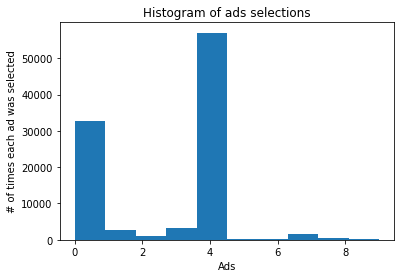

In [11]:
plt.hist(ad_scores)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('# of times each ad was selected')
plt.show()